# Curse of dimensionality

This Jupyter Notebook is from: https://github.com/julienr/ipynb_playground
Based on this article : http://www.edupristine.com/blog/curse-dimensionality

In [1]:
import numpy as np
import pylab as pl
%matplotlib inline
# make your plot outputs appear and be stored within the notebook

## Sampling

How curse of dimensionality impacts sampling.

This the sampling example of the original article.

<img src="files/curse-of-dimensionality_1.png" />
[Original image](http://content.edupristine.com/images/blogs/curse-of-dimensionality_1.png)

E.g.: we have 100,000 students in a university, we want to sample 1% of all the students and measure their heights and weights.

Let's say we want to sample a target percentage ($p$) of our points.
If our points are in $n$ dimensions, we have to sample $x$ percent of the range along each dimension to
achieve overall $p$ sampling rate.

$$x^n = p$$

So if we want to find $x$ for a given dimension

$$x = p^\frac{1}{n}$$

x equals nth root of P. Let's plot this

In [2]:
# we want to sample 1% of our points
p = 0.01
n = np.arange(1, 50)

# p to the power of (1.0/n)
# 1.0 instead of 1, becasue we want python calculate results using float numbers
# or 1/2 = 0
x = p**(1.0 / n)
# x is sampling rate, n is dimensionality
print(n)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
[0.01       0.1        0.21544347 0.31622777 0.39810717 0.46415888
 0.51794747 0.56234133 0.59948425 0.63095734 0.65793322 0.68129207
 0.70170383 0.71968567 0.73564225 0.74989421 0.76269859 0.77426368
 0.78475997 0.79432823 0.80308572 0.81113083 0.81854673 0.82540419
 0.83176377 0.83767764 0.84319093 0.8483429  0.85316785 0.8576959
 0.86195357 0.86596432 0.869749   0.87332616 0.87671239 0.87992254
 0.88297    0.88586679 0.88862382 0.89125094 0.89375712 0.8961505
 0.89843854 0.90062802 0.90272518 0.90473572 0.90666491 0.90851758
 0.91029818]


Text(0, 0.5, 'percentage of range')

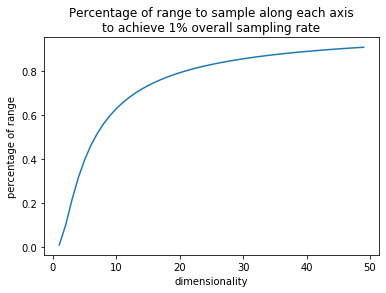

In [3]:
pl.title('Percentage of range to sample along each axis\nto achieve 1% overall sampling rate')
pl.plot(n, x)
pl.xlabel('dimensionality')
pl.ylabel('percentage of range')

## Distance

Calculate ratio between hypersphere and hypercube.

This is the distance example. High dimension 

<img src="files/curse-of-dimensionality_2.png" />
[Original image](http://content.edupristine.com/images/blogs/curse-of-dimensionality_2.png)

(Image linked from the article)

Given a square (or a cube or hypercube), we want to find what volume of the hypercube is covered by the biggest possible hypersphere. Since many algorithms rely on euclidean distance to define nearness, this gives an idea of how many points will fall in our sphere if we choose the biggest possible radius. This should be high for our algorithms to work as intended.

For example, if you're in 2D and you have points in the ranges [0, 10], [0, 10], you would except that setting a distance threshold of 10 will include most of the points (obviously missing the points in the corner). If we increase the dimensionality, the volume of the "corners" will increase proportionally to our sphere's volume.

The volume of an hypersphere of dimension n can be [computed recursively](https://en.wikipedia.org/wiki/Volume_of_an_n-ball#Recursions) :

$$V_2(R) = \pi R^2$$

$$V_3(R) = \frac{4}{3} \pi R^3$$

$$V_n(R) = \frac{2\pi R^2}{n} V_{n-2}(R)$$

In [7]:
# volume of n-spheres of radius R
dims = np.arange(15)
# radius always 1
R = 1.0
# volumn of n-spheres
S_n = [1, # 0 dim
       2 * R, # 1 dim
       np.pi * R**2, # 2 dim
       4.0/3.0 * np.pi * R**3] # 3 dim
# calculate volumn for n = 4, 5, ... 15
for n in dims[4:]:
    S_n.append((2 * np.pi * R**2 / float(n)) * S_n[n - 2])
S_n = np.array(S_n)
print(dims)
print(dims[4:])
print(S_n)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 4  5  6  7  8  9 10 11 12 13 14]
[1.         2.         3.14159265 4.1887902  4.9348022  5.26378901
 5.16771278 4.72476597 4.05871213 3.2985089  2.55016404 1.88410388
 1.33526277 0.91062875 0.59926453]


In [6]:
# volume of hypercubes of edge length 2*R
# changing radius from R to 2*R
# C_n is the volume of hypercubes
C_n = np.array([(2*R)**n for n in dims])
print(C_n)
# how [n for n in list]
a_list = [1,2,3,4,5]
print([a*2 for a in a_list])

[1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01
 6.4000e+01 1.2800e+02 2.5600e+02 5.1200e+02 1.0240e+03 2.0480e+03
 4.0960e+03 8.1920e+03 1.6384e+04]
[2, 4, 6, 8, 10]


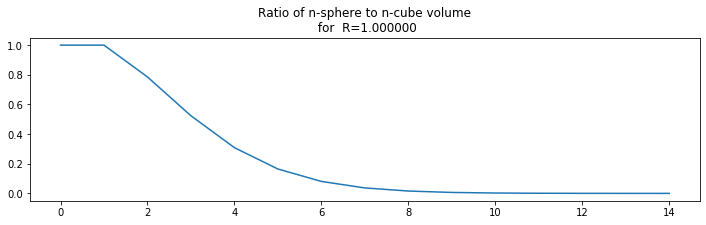

In [5]:
pl.figure(figsize=(12, 3))

ax1 = pl.subplot(111)
ax1.set_title('Ratio of n-sphere to n-cube volume\n for  R=%f' % R)
ax1.plot(dims, S_n/C_n)